In [1]:
import random
import time
import matplotlib.pyplot as plt
import numpy as np

In [2]:
class RBNode:

    def __init__(self, value):
        self.value = value
        self.left = None
        self.right = None
        self.parent = None
        self.colour = "R"

    def get_uncle(self):
        return

    def is_leaf(self):
        return self.left == None and self.right == None

    def is_left_child(self):
        return self == self.parent.left

    def is_right_child(self):
        return not self.is_left_child()

    def is_red(self):
        return self.colour == "R"

    def is_black(self):
        return not self.is_red()

    def make_black(self):
        self.colour = "B"

    def make_red(self):
        self.colour = "R"

    def get_brother(self):
        if self.parent.right == self:
            return self.parent.left
        return self.parent.right

    def get_uncle(self):
        return self.parent.get_brother()

    def uncle_is_black(self):
        if self.get_uncle() == None:
            return True
        return self.get_uncle().is_black()

    def __str__(self):
        return "(" + str(self.value) + "," + self.colour + ")"

    def __repr__(self):
         return "(" + str(self.value) + "," + self.colour + ")"

    def rotate_right(self):
        #TODO
        return 0

    def rotate_left(self):
        #TODO
        return 0
                    
        
    

In [3]:
class RBTree:

    def __init__(self,):
        self.root = None

    def is_empty(self,):
        return self.root == None

    def get_height(self,):
        if self.is_empty():
            return 0
        return self.__get_height(self.root)

    def __get_height(self, node):
        if node == None:
            return 0
        return 1 + max(self.__get_height(node.left), self.__get_height(node.right))

    def insert(self, value):
        if self.is_empty():
            self.root = RBNode(value)
            self.root.make_black()
        else:
            self.__insert(self.root, value)

    def __insert(self, node, value):
        if value < node.value:
            if node.left == None:
                node.left = RBNode(value)
                node.left.parent = node
                self.fix(node.left)
            else:
                self.__insert(node.left, value)
        else:
            if node.right == None:
                node.right = RBNode(value)
                node.right.parent = node
                self.fix(node.right)
            else:
                self.__insert(node.right, value)

    def fix(self, node):
        #You may alter code in this method if you wish, it's merely a guide.
        if node.parent == None:
            node.make_black()
        while node != None and node.parent != None and node.parent.is_red(): 
            #TODO
        self.root.make_black()

    def __str__(self):
        if self.is_empty():
            return "[]"
        return "[" + self.__str_helper(self.root) + "]"

    def __str_helper(self, node):
        if node.is_leaf():
            return "[" + str(node) + "]"
        if node.left == None:
            return "[" + str(node) + " -> " + self.__str_helper(node.right) + "]"
        if node.right == None:
            return "[" +  self.__str_helper(node.left) + " <- " + str(node) + "]"
        return "[" + self.__str_helper(node.left) + " <- " + str(node) + " -> " + self.__str_helper(node.right) + "]"


IndentationError: expected an indented block after 'while' statement on line 46 (87019639.py, line 48)

### Part 2: Binary Search Using Dynamic Programming

#### Part 2.1: Implementation of Dynamic Binary Search (SEARCH, INSERT, DELETE operations)

In [4]:
# traditional binary search
def binary_search_5(item_list, to_find):
    left = 0
    right = len(item_list) - 1
    while left <= right:
        mid = (left + right) // 2
        if item_list[mid] == to_find:
            return mid
        elif item_list[mid] < to_find:
            left = mid + 1
        else:
            right = mid - 1
    return -1  # Element not found

In [5]:
# helper function to find bits to represent length of list in binary
def find_list_index(n):
    k = n.bit_length()  # Number of bits required to represent n
    return k - 1

In [6]:
# search function
def search(lists, to_find):
    list_index = find_list_index(sum(len(sub_list) for sub_list in lists))
    for i in range(list_index + 1):
        sub_list = lists[i]
        if sub_list:
            idx = binary_search_5(sub_list, to_find)
            if idx != -1:
                return idx + sum(len(sub_list) for sub_list in lists[:i])
    return -1  # Element not found

In [7]:
# insert function
def insert(lists, element):
    list_index = find_list_index(sum(len(sub_list) for sub_list in lists) + 1)
    idx = search(lists, element)
    if idx == -1:
        lists[0] = [element]  # Insert in the first list
    else:
        while list_index >= 0:
            if lists[list_index]:  # If list is not empty
                lists[list_index].append(element)
                lists[list_index].sort()
                break
            else:
                list_index -= 1

In [8]:
# delete function
def delete(lists, element):
    idx = search(lists, element)
    if idx != -1:
        list_index = find_list_index(sum(len(sub_list) for sub_list in lists))
        while list_index >= 0:
            if lists[list_index]:  # If list is not empty
                if element in lists[list_index]:
                    lists[list_index].remove(element)
                    return
            list_index -= 1
    else:
        print("Element not found.")

In [9]:
# testing
lists = [[] for _ in range(4)]  # Initialize with 4 empty lists
elements = [2, 5, 8, 10, 15]
for elem in elements:
    insert(lists, elem)

print("Lists:", lists)
print("Search for 8:", search(lists, 8))  # Output: 6 (index of 8)
print("Search for 20:", search(lists, 20))  # Output: -1 (not found)

delete(lists, 8)
print("Lists after deleting 8:", lists)

Lists: [[15], [], [], []]
Search for 8: -1
Search for 20: -1
Element not found.
Lists after deleting 8: [[15], [], [], []]


#### Part 2.2: Experiment to Compare Performance

In [10]:
def binary_search_1(item_list, to_find):
    lower = 0
    upper = len(item_list) - 1
    count = 0
    while lower < upper:
        count += 1
        mid = (lower + upper) // 2
        if item_list[mid] == to_find:
            return True, count
        if item_list[mid] < to_find:
            lower = mid + 1
        else:
            upper = mid
    return item_list[lower] == to_find, count

In [11]:
def binary_search_2(item_list, to_find):
    lower = 0
    upper = len(item_list) - 1
    count = 0
    while lower <= upper:
        count += 1
        mid = (lower + upper) // 2
        if item_list[mid] == to_find:
            return True, count
        if item_list[mid] < to_find:
            lower = mid + 1
        else:
            upper = mid - 1
    return item_list[lower] == to_find, count

In [12]:
def binary_search_3(item_list, to_find):
    left = 0
    right = len(item_list) - 1
    count = 0
    while left != right:
        count += 1
        mid = (left + right) // 2
        if item_list[mid] < to_find:
            left = mid + 1
        elif item_list[mid] > to_find:
            right = mid
        else:
            return True, count
    return item_list[left] == to_find, count

In [16]:
def binary_search_4(item_list, to_find):
    def recursive_search(low, high, count=0):
        if high - low <= 1:
            return (item_list[low] == to_find or item_list[high] == to_find, count)

        mid = low + (high - low) // 2

        if to_find < item_list[mid]:
            return recursive_search(low, mid - 1, count + 1)
        elif to_find > item_list[mid]:
            return recursive_search(mid + 1, high, count + 1)
        else:
            return (True, count)

    return recursive_search(0, len(item_list) - 1)

In [14]:
# Generate random list of given size
def generate_random_list(size):
    return sorted(random.sample(range(10 * size), size))

# Experiment parameters
list_sizes = [100, 1000, 10000, 100000, 1000000, 10000000]
num_trials = 100

In [17]:
# Perform experiment
search_times = [[] for _ in range(5)]

for size in list_sizes:
    item_list = generate_random_list(size)
    target = random.choice(item_list)
    
    for i in range(num_trials):
        start_time = time.time()
        binary_search_1(item_list, target)
        end_time = time.time()
        search_times[0].append((end_time - start_time) * 1000)  # Convert to milliseconds

        start_time = time.time()
        binary_search_2(item_list, target)
        end_time = time.time()
        search_times[1].append((end_time - start_time) * 1000)  # Convert to milliseconds

        start_time = time.time()
        binary_search_3(item_list, target)
        end_time = time.time()
        search_times[2].append((end_time - start_time) * 1000)  # Convert to milliseconds

        start_time = time.time()
        binary_search_4(item_list, target)
        end_time = time.time()
        search_times[3].append((end_time - start_time) * 1000)  # Convert to milliseconds

        start_time = time.time()
        binary_search_5([item_list], target)
        end_time = time.time()
        search_times[4].append((end_time - start_time) * 1000)  # Convert to milliseconds


TypeError: '<' not supported between instances of 'list' and 'int'

ValueError: shape mismatch: objects cannot be broadcast to a single shape.  Mismatch is between arg 0 with shape (6,) and arg 1 with shape (0,).

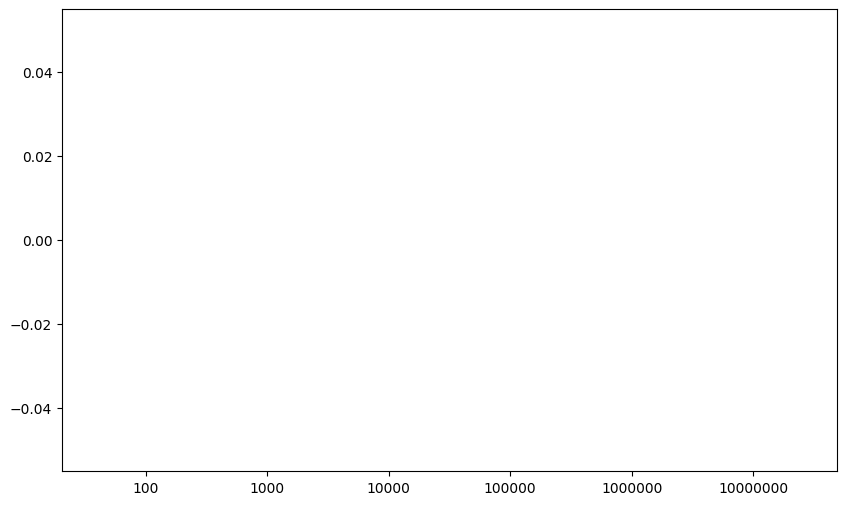

In [18]:
# Plotting
labels = ["Binary Search 1", "Binary Search 2", "Binary Search 3", "Binary Search 4", "Binary Search 5"]
colors = ["blue", "orange", "green", "red", "purple"]

plt.figure(figsize=(10, 6))
for i in range(5):
    plt.bar([str(size) for size in list_sizes], [sum(search_times[i][j:j+num_trials]) / num_trials for j in range(0, len(search_times[i]), num_trials)], label=labels[i], color=colors[i])

plt.xlabel("List Size")
plt.ylabel("Average Search Time (ms)")
plt.title("Comparison of Binary Search Implementations")
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()